In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from datetime import datetime, date
from google.colab import files
import io
import random


> **BQ1**: ¿Cuántas descargas al día tiene la aplicación? (Tipo 1)
>> https://console.firebase.google.com/project/parchapp-69530/analytics/app/ios:com.simonrendon.ParchApp/events/~2Foverview%3Ft%3D1651777504047&fpn%3D112552663887&swu%3D1&sgu%3D1&sus%3Dupgraded&params%3D_r..layout.pageNumber%253D0%2526_u..pageSize%253D25&cs%3Dapp.m.events.overview&g%3D1


> **BQ2**: ¿Cuales son las horas y los días donde la aplicación tiene es más utilizada por los usuarios? (Tipo 1)
>> https://console.firebase.google.com/project/parchapp-69530/analytics/app/ios:com.simonrendon.ParchApp/events/~2Foverview%3Ft%3D1651777504047&fpn%3D112552663887&swu%3D1&sgu%3D1&sus%3Dupgraded&params%3D_r..layout.pageNumber%253D0%2526_u..pageSize%253D25&cs%3Dapp.m.events.overview&g%3D1


> **BQ3**: ¿Cuál es la frecuencia promedio con la que los grupos de amigos arman un plan por la app? (Tipo 2)
>> _Revisar codigo anexo_


> **BQ4**: ¿Cuánto es el tiempo promedio de uso de la aplicación? (Tipo 2)
>> https://console.firebase.google.com/project/parchapp-69530/analytics/app/ios:com.simonrendon.ParchApp/overview/~2F%3Ft%3D1651790528362&fpn%3D112552663887&swu%3D1&sgu%3D1&sus%3Dupgraded&params%3D_u..pageSize%253D25&cs%3Dapp.m.dashboard.overview&g%3D1

> **BQ5**: ¿Qué porcentaje de planes sugeridos son llevados a cabo? (Tipo 2)
>> _Revisar codigo anexo_

> **BQ6**: ¿Cuál es la calificación promedio de los planes sugeridos? (Tipo 2)
>> _Revisar codigo anexo_

> **BQ7**: ¿Cuantos posts realiza en promedio cada usuario? (Tipo 3)
>> _Revisar codigo anexo_


> **BQ8**: ¿Cuáles son las 3 funcionalidades que mas se usan? (Tipo 3)
>> https://console.firebase.google.com/project/parchapp-69530/analytics/app/android:com.example.parchapp/overview/~2F%3Ft%3D1651860090788&fpn%3D112552663887&swu%3D1&sgu%3D1&sus%3Dupgraded&cs%3Dapp.m.dashboard.overview&g%3D1


> **BQ10**: ¿Cual es el precio promedio de los planes con calificacion entre 4 y 5? (Tipo 4)
>> _Revisar codigo anexo_


> **BQ12**: ¿Qué tipo de planes son los más efectivos? (Tipo 4)
>> _Revisar codigo anexo_

> **BQ13**: ¿Que lugares de la ciudad son más frecuentados? (Tipo 5)
>> _Revisar codigo anexo_

> **BQ14**: ¿En qué lugar de la aplicación son más frecuentes las fallas? (Tipo 5)

In [ ]:
json_planes = requests.get('http://44.198.195.210:8080/planes').json()
json_posts = requests.get('http://44.198.195.210:8080/posts').json()

# **BQ3**

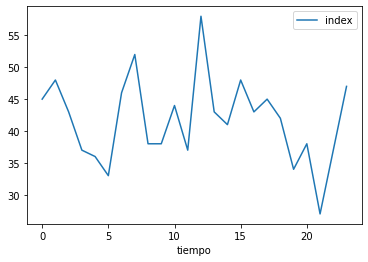

In [ ]:
def bq3():
  descripciones = []
  eventos = []
  grupos = []
  horaInicios = []
  lugares = []
  nombres = []
  presupuestos = []

  df = pd.DataFrame()
  for i in range(0,1000):
    descripciones.append(json_planes[i]['fields']['descripcion'])
  for i in range(0,1000):
    eventos.append(json_planes[i]['fields']['evento'])
  for i in range(0,1000):
    grupos.append(json_planes[i]['fields']['grupo'])
  for i in range(0,1000):
    horaInicios.append(json_planes[i]['fields']['horaInicia'])
  for i in range(0,1000):
    lugares.append(json_planes[i]['fields']['lugar'])
  for i in range(0,1000):
    nombres.append(json_planes[i]['fields']['nombre'])
  for i in range(0,1000):
    presupuestos.append(json_planes[i]['fields']['presupuesto'])
  objts = ['descripcion','evento', 'grupo', 'horaInicio', 'lugar', 'nombre', 'presupuesto']
  
  df['descripcione'] = descripciones
  df['evento'] = eventos
  df['grupo'] = grupos
  df['horaInicio'] = horaInicios
  df['lugar'] = lugares
  df['nombre'] = nombres
  df['presupuesto'] = presupuestos

  df.horaInicio = df.horaInicio.apply(lambda x: datetime.strptime(x.split('T')[1].split('Z')[0], '%H:%M:%S').time())
  df = df.sort_values(by='horaInicio', ascending = False)
  fechas = df.horaInicio.to_numpy()
  promedios = []
  for i in range(0, len(fechas)):
    try:
      x = datetime.combine(date.today(), fechas[i]) - datetime.combine(date.today(), fechas[i+1])
      promedios.append(x)
    except:
      pass
  df['tiempo'] = df.horaInicio.apply(lambda x: int(str(x).split(':')[0]))
  df = df.reset_index()
  return df[['index','tiempo']].groupby('tiempo').count().plot()

bq3()


# **BQ5**

In [ ]:
def bq5():
  ## Planes sugeridos tienen un indice primo

  def isPrime(num):
    ret = True
    if num > 1:
      # Iterate from 2 to n / 2
      for i in range(2, int(num/2)+1):
    
          # If num is divisible by any number between
          # 2 and n / 2, it is not prime
          if (num % i) == 0:
              ret = False
              break
          else:
              ret = True
  
    else:
        ret = False
    return ret

  descripciones = []
  eventos = []
  grupos = []
  horaInicios = []
  lugares = []
  nombres = []
  presupuestos = []

  df = pd.DataFrame()
  for i in range(0,1000):
    descripciones.append(json_planes[i]['fields']['descripcion'])
  for i in range(0,1000):
    eventos.append(json_planes[i]['fields']['evento'])
  for i in range(0,1000):
    grupos.append(json_planes[i]['fields']['grupo'])
  for i in range(0,1000):
    horaInicios.append(json_planes[i]['fields']['horaInicia'])
  for i in range(0,1000):
    lugares.append(json_planes[i]['fields']['lugar'])
  for i in range(0,1000):
    nombres.append(json_planes[i]['fields']['nombre'])
  for i in range(0,1000):
    presupuestos.append(json_planes[i]['fields']['presupuesto'])
  objts = ['descripcion','evento', 'grupo', 'horaInicio', 'lugar', 'nombre', 'presupuesto']
  
  df['descripcione'] = descripciones
  df['evento'] = eventos
  df['grupo'] = grupos
  df['horaInicio'] = horaInicios
  df['lugar'] = lugares
  df['nombre'] = nombres
  df['presupuesto'] = presupuestos
  n_prms = [i for i in range(0,1000) if isPrime(i)]
  # 
  df = df.reset_index().iloc[n_prms]
  df['llevado_a_cabo'] = np.random.randint(0, 2, df.shape[0])
  llevadosacabo = len(df[df.llevado_a_cabo == 1].index)
  total = len(df.index)
  pctj = 100*float(llevadosacabo/total)
  respuesta = 'El porcentaje de planes sugeridos que fueron llevados a cabo es de: {}%'.format(str(pctj))
  return respuesta
  

bq5()

'El porcentaje de planes sugeridos que fueron llevados a cabo es de: 54.761904761904766%'

# **BQ6**

In [ ]:
def bq6():
  ## Planes sugeridos tienen un indice primo
  def isPrime(num):
    ret = True
    if num > 1:
      # Iterate from 2 to n / 2
      for i in range(2, int(num/2)+1):
    
          # If num is divisible by any number between
          # 2 and n / 2, it is not prime
          if (num % i) == 0:
              ret = False
              break
          else:
              ret = True
  
    else:
        ret = False
    return ret

  descripciones = []
  eventos = []
  grupos = []
  horaInicios = []
  lugares = []
  nombres = []
  presupuestos = []

  df = pd.DataFrame()
  for i in range(0,1000):
    descripciones.append(json_planes[i]['fields']['descripcion'])
  for i in range(0,1000):
    eventos.append(json_planes[i]['fields']['evento'])
  for i in range(0,1000):
    grupos.append(json_planes[i]['fields']['grupo'])
  for i in range(0,1000):
    horaInicios.append(json_planes[i]['fields']['horaInicia'])
  for i in range(0,1000):
    lugares.append(json_planes[i]['fields']['lugar'])
  for i in range(0,1000):
    nombres.append(json_planes[i]['fields']['nombre'])
  for i in range(0,1000):
    presupuestos.append(json_planes[i]['fields']['presupuesto'])
  objts = ['descripcion','evento', 'grupo', 'horaInicio', 'lugar', 'nombre', 'presupuesto']
  
  df['descripcione'] = descripciones
  df['evento'] = eventos
  df['grupo'] = grupos
  df['horaInicio'] = horaInicios
  df['lugar'] = lugares
  df['nombre'] = nombres
  df['presupuesto'] = presupuestos
  n_prms = [i for i in range(0,1000) if isPrime(i)]
  # 
  df = df.reset_index().iloc[n_prms]
  df['calificacion'] = np.random.randint(1, 6, df.shape[0])
  
  respuesta = 'La calificación promedio de planes sugeridos que fueron llevados a cabo es de: {}'.format(float(df.calificacion.mean()))
  return respuesta
  

bq6()

'La calificación promedio de planes sugeridos que fueron llevados a cabo es de: 3.0297619047619047'

# **BQ7**

In [ ]:
def bq7():
  titulo = []
  descripcion = []
  calificacion = []
  anuncio = []
  cliente = []
  lugar = []
  representante = []

  df = pd.DataFrame()
  for i in range(0,507):
    titulo.append(json_posts[i]['fields']['titulo'])
  for i in range(0,507):
    descripcion.append(json_posts[i]['fields']['descripcion'])
  for i in range(0,507):
    calificacion.append(json_posts[i]['fields']['calificacion'])
  for i in range(0,507):
    anuncio.append(json_posts[i]['fields']['anuncio'])
  for i in range(0,507):
    cliente.append(json_posts[i]['fields']['cliente'])
  for i in range(0,507):
    lugar.append(json_posts[i]['fields']['lugar'])
  for i in range(0,507):
    representante.append(json_posts[i]['fields']['representante'])

  df['titulo'] = titulo
  df['descripcion'] = descripcion
  df['calificacion'] = calificacion
  df['anuncio'] = anuncio
  df['cliente'] = cliente
  df['lugar'] = lugar
  df['representante'] = representante
  rta = float(df[['cliente','calificacion']].groupby('cliente').count().mean())
  return 'Un usuario realiza en promedio {} posts'.format(str(rta))

bq7()

'Un usuario realiza en promedio 1.2770780856423174 posts'

## **BQ10**

In [ ]:
def bq10():
  descripciones = []
  eventos = []
  grupos = []
  horaInicios = []
  lugares = []
  nombres = []
  presupuestos = []

  dfplanes = pd.DataFrame()

  for i in range(0,1000):
    descripciones.append(json_planes[i]['fields']['descripcion'])
  for i in range(0,1000):
    eventos.append(json_planes[i]['fields']['evento'])
  for i in range(0,1000):
    grupos.append(json_planes[i]['fields']['grupo'])
  for i in range(0,1000):
    horaInicios.append(json_planes[i]['fields']['horaInicia'])
  for i in range(0,1000):
    lugares.append(json_planes[i]['fields']['lugar'])
  for i in range(0,1000):
    nombres.append(json_planes[i]['fields']['nombre'])
  for i in range(0,1000):
    presupuestos.append(json_planes[i]['fields']['presupuesto'])

  dfplanes['descripcione'] = descripciones
  dfplanes['evento'] = eventos
  dfplanes['grupo'] = grupos
  dfplanes['horaInicio'] = horaInicios
  dfplanes['lugar'] = lugares
  dfplanes['nombre'] = nombres
  dfplanes['presupuesto'] = presupuestos

  dfplanes = dfplanes[['lugar', 'presupuesto']]

  # Posts
  titulo = []
  descripcion = []
  calificacion = []
  anuncio = []
  cliente = []
  lugar = []
  representante = []

  dfposts = pd.DataFrame()
  for i in range(0,507):
    titulo.append(json_posts[i]['fields']['titulo'])
  for i in range(0,507):
    descripcion.append(json_posts[i]['fields']['descripcion'])
  for i in range(0,507):
    calificacion.append(json_posts[i]['fields']['calificacion'])
  for i in range(0,507):
    anuncio.append(json_posts[i]['fields']['anuncio'])
  for i in range(0,507):
    cliente.append(json_posts[i]['fields']['cliente'])
  for i in range(0,507):
    lugar.append(json_posts[i]['fields']['lugar'])
  for i in range(0,507):
    representante.append(json_posts[i]['fields']['representante'])

  dfposts['titulo'] = titulo
  dfposts['descripcion'] = descripcion
  dfposts['calificacion'] = calificacion
  dfposts['anuncio'] = anuncio
  dfposts['cliente'] = cliente
  dfposts['lugar'] = lugar
  dfposts['representante'] = representante
  dfposts = dfposts[['lugar', 'calificacion']]
  
  merge = pd.merge(dfplanes, dfposts, on='lugar')
  bienclasificados = merge[merge.calificacion >= 4]
  promedio = 'El promedio de precio de planes con calificacion entre 4 y 5 es de {}'.format(str(bienclasificados.presupuesto.mean()))
  return promedio

bq10()

'El promedio de precio de planes con calificacion entre 4 y 5 es de 120563.6168224299'

## **BQ12**

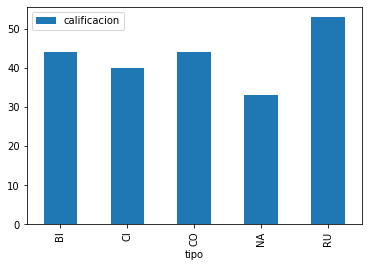

In [ ]:
def bq12():
  descripciones = []
  eventos = []
  grupos = []
  horaInicios = []
  lugares = []
  nombres = []
  presupuestos = []

  dfplanes = pd.DataFrame()

  for i in range(0,1000):
    descripciones.append(json_planes[i]['fields']['descripcion'])
  for i in range(0,1000):
    eventos.append(json_planes[i]['fields']['evento'])
  for i in range(0,1000):
    grupos.append(json_planes[i]['fields']['grupo'])
  for i in range(0,1000):
    horaInicios.append(json_planes[i]['fields']['horaInicia'])
  for i in range(0,1000):
    lugares.append(json_planes[i]['fields']['lugar'])
  for i in range(0,1000):
    nombres.append(json_planes[i]['fields']['nombre'])
  for i in range(0,1000):
    presupuestos.append(json_planes[i]['fields']['presupuesto'])

  dfplanes['descripcione'] = descripciones
  dfplanes['evento'] = eventos
  dfplanes['grupo'] = grupos
  dfplanes['horaInicio'] = horaInicios
  dfplanes['lugar'] = lugares
  dfplanes['nombre'] = nombres
  dfplanes['presupuesto'] = presupuestos
  dfplanes['tipo'] = np.random.choice(['RU','CI','BI','CO','NA'], dfplanes.shape[0])

  titulo = []
  descripcion = []
  calificacion = []
  anuncio = []
  cliente = []
  lugar = []
  representante = []

  dfposts = pd.DataFrame()
  for i in range(0,507):
    titulo.append(json_posts[i]['fields']['titulo'])
  for i in range(0,507):
    descripcion.append(json_posts[i]['fields']['descripcion'])
  for i in range(0,507):
    calificacion.append(json_posts[i]['fields']['calificacion'])
  for i in range(0,507):
    anuncio.append(json_posts[i]['fields']['anuncio'])
  for i in range(0,507):
    cliente.append(json_posts[i]['fields']['cliente'])
  for i in range(0,507):
    lugar.append(json_posts[i]['fields']['lugar'])
  for i in range(0,507):
    representante.append(json_posts[i]['fields']['representante'])

  dfposts['titulo'] = titulo
  dfposts['descripcion'] = descripcion
  dfposts['calificacion'] = calificacion
  dfposts['anuncio'] = anuncio
  dfposts['cliente'] = cliente
  dfposts['lugar'] = lugar
  dfposts['representante'] = representante
  dfposts = dfposts[['lugar', 'calificacion']]
  
  merge = pd.merge(dfplanes, dfposts, on='lugar')
  mejores = merge[merge.calificacion>=4][['tipo','calificacion']]

  return mejores.groupby('tipo').count().plot(kind='bar')


bq12()

## **BQ13**

In [ ]:
uploaded4 = files.upload()

Saving lugaresbogota.xlsx to lugaresbogota (1).xlsx


In [ ]:
lugares = pd.read_excel(io.BytesIO(uploaded4['lugaresbogota.xlsx'])).Lugares.to_numpy()
lugares

array(['Zona T', 'Calle 85', 'Parque de la 93', 'Usaquen', 'Teusaquillo',
       'Centro Andino', 'CC Santa Fe', 'Zona G', 'Teatron', 'Av Caracas',
       'Centro de Bogota'], dtype=object)

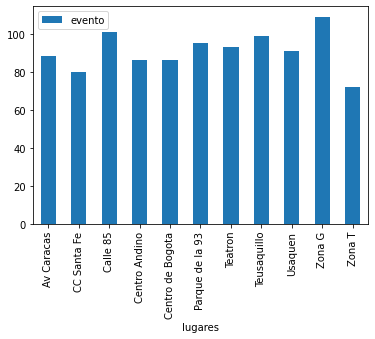

In [ ]:
def bq13():
  descripciones = []
  eventos = []
  grupos = []
  horaInicios = []
  lugares = []
  nombres = []
  presupuestos = []

  dfplanes = pd.DataFrame()

  for i in range(0,1000):
    descripciones.append(json_planes[i]['fields']['descripcion'])
  for i in range(0,1000):
    eventos.append(json_planes[i]['fields']['evento'])
  for i in range(0,1000):
    grupos.append(json_planes[i]['fields']['grupo'])
  for i in range(0,1000):
    horaInicios.append(json_planes[i]['fields']['horaInicia'])
  for i in range(0,1000):
    lugares.append(json_planes[i]['fields']['lugar'])
  for i in range(0,1000):
    nombres.append(json_planes[i]['fields']['nombre'])
  for i in range(0,1000):
    presupuestos.append(json_planes[i]['fields']['presupuesto'])

  dfplanes['descripcione'] = descripciones
  dfplanes['evento'] = eventos
  dfplanes['grupo'] = grupos
  dfplanes['horaInicio'] = horaInicios
  dfplanes['lugar'] = lugares
  dfplanes['nombre'] = nombres
  dfplanes['presupuesto'] = presupuestos
  dfplanes['tipo'] = np.random.choice(['RU','CI','BI','CO','NA'], dfplanes.shape[0])
  lugares = pd.read_excel(io.BytesIO(uploaded4['lugaresbogota.xlsx'])).Lugares.to_numpy()
  dfplanes['lugares'] = np.random.choice(lugares, dfplanes.shape[0])

  return dfplanes[['evento','lugares']].groupby('lugares').count().plot(kind='bar')

bq13()